In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [41]:
cities_df= pd.DataFrame(columns =["Latitude","Longitude","City", "Country","Temperature (F)","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"])
lat = []
lng = []
cities=[]
countries=[]
for x in range(0,1500):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
cities_df["Latitude"]=lat
cities_df["Longitude"]=lng

for index, row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities.append(city.city_name)
    countries.append(city.country_code)
cities_df['City']=cities
cities_df['Country']=countries
cities_df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,-85.361100,-42.209235,ushuaia,ar,NaN,NaN,NaN,NaN
1,49.426291,113.698115,aksha,ru,NaN,NaN,NaN,NaN
2,4.930636,66.864281,eydhafushi,mv,NaN,NaN,NaN,NaN
3,57.465714,172.087405,nikolskoye,ru,NaN,NaN,NaN,NaN
4,-13.421994,68.285588,grand gaube,mu,NaN,NaN,NaN,NaN


In [42]:
new_dataframe = cities_df.drop_duplicates("City",keep="first")
len(new_dataframe)

632

In [43]:
temp = []
humidity =[]
clouds = []
wind = []

counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
city=row["City"]
units = "imperial"

for index, row in new_dataframe.iterrows():
    counter +=1
    city = row["City"]
    target_url = f"{url}appid={api_key}&q={city}&units={units}"
    print("This is city number "+str(counter))
    print("The name of the city is "+row["City"])
    print(target_url)
    print("__________________________________________________________________________________________")
    info = requests.get(target_url).json()
    if info["cod"]=="404":
        print("City not found, skipping...")
    else:
        new_dataframe.at[index,"Temperature (F)"]= info["main"]["temp"]
        new_dataframe.at[index,"Humidity (%)"]=info["main"]["humidity"]
        new_dataframe.at[index,"Cloudiness (%)"]=info["clouds"]["all"]
        new_dataframe.at[index,"Wind Speed (mph)"]=info["wind"]["speed"]

This is city number 1
The name of the city is ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ushuaia&units=imperial
__________________________________________________________________________________________
This is city number 2
The name of the city is aksha
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=aksha&units=imperial
__________________________________________________________________________________________
This is city number 3
The name of the city is eydhafushi
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=eydhafushi&units=imperial
__________________________________________________________________________________________
This is city number 4
The name of the city is nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nikolskoye&units=imperial
___________________________________________________________

This is city number 34
The name of the city is taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=taolanaro&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 35
The name of the city is ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ponta do sol&units=imperial
__________________________________________________________________________________________
This is city number 36
The name of the city is namibe
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=namibe&units=imperial
__________________________________________________________________________________________
This is city number 37
The name of the city is bluff
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=bluff&units=imperial
___________________________

This is city number 67
The name of the city is albany
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=albany&units=imperial
__________________________________________________________________________________________
This is city number 68
The name of the city is lorengau
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=lorengau&units=imperial
__________________________________________________________________________________________
This is city number 69
The name of the city is puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=puerto ayora&units=imperial
__________________________________________________________________________________________
This is city number 70
The name of the city is tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=tuatapere&units=imperial
_________________________________________________

This is city number 99
The name of the city is margate
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=margate&units=imperial
__________________________________________________________________________________________
This is city number 100
The name of the city is severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=severo-kurilsk&units=imperial
__________________________________________________________________________________________
This is city number 101
The name of the city is egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=egvekinot&units=imperial
__________________________________________________________________________________________
This is city number 102
The name of the city is hermanus
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=hermanus&units=imperial
________________________________________

This is city number 130
The name of the city is mapiripan
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=mapiripan&units=imperial
__________________________________________________________________________________________
This is city number 131
The name of the city is cidreira
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=cidreira&units=imperial
__________________________________________________________________________________________
This is city number 132
The name of the city is vammala
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=vammala&units=imperial
__________________________________________________________________________________________
This is city number 133
The name of the city is zhigalovo
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=zhigalovo&units=imperial
_________________________________________________

This is city number 162
The name of the city is palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=palabuhanratu&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 163
The name of the city is atar
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=atar&units=imperial
__________________________________________________________________________________________
This is city number 164
The name of the city is mount isa
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=mount isa&units=imperial
__________________________________________________________________________________________
This is city number 165
The name of the city is kaa-khem
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kaa-khem&units=imperial
___________________

This is city number 195
The name of the city is ust-maya
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ust-maya&units=imperial
__________________________________________________________________________________________
This is city number 196
The name of the city is los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=los llanos de aridane&units=imperial
__________________________________________________________________________________________
This is city number 197
The name of the city is leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=leningradskiy&units=imperial
__________________________________________________________________________________________
This is city number 198
The name of the city is charters towers
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=charters towers&units=imperial
_

City not found, skipping...
This is city number 226
The name of the city is moyale
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=moyale&units=imperial
__________________________________________________________________________________________
This is city number 227
The name of the city is chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=chokurdakh&units=imperial
__________________________________________________________________________________________
This is city number 228
The name of the city is nome
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nome&units=imperial
__________________________________________________________________________________________
This is city number 229
The name of the city is ustyuzhna
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ustyuzhna&units=imperial
_____________________________

This is city number 259
The name of the city is brokopondo
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=brokopondo&units=imperial
__________________________________________________________________________________________
This is city number 260
The name of the city is okha
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=okha&units=imperial
__________________________________________________________________________________________
This is city number 261
The name of the city is harper
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=harper&units=imperial
__________________________________________________________________________________________
This is city number 262
The name of the city is karratha
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=karratha&units=imperial
___________________________________________________________

This is city number 291
The name of the city is olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=olafsvik&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 292
The name of the city is srandakan
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=srandakan&units=imperial
__________________________________________________________________________________________
This is city number 293
The name of the city is aquiraz
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=aquiraz&units=imperial
__________________________________________________________________________________________
This is city number 294
The name of the city is amderma
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=amderma&units=imperial
_________________________

This is city number 323
The name of the city is cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=cap malheureux&units=imperial
__________________________________________________________________________________________
This is city number 324
The name of the city is takoradi
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=takoradi&units=imperial
__________________________________________________________________________________________
This is city number 325
The name of the city is ust-kamchatsk
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ust-kamchatsk&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 326
The name of the city is flin flon
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=flin flon&units=imperial

This is city number 355
The name of the city is pontianak
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=pontianak&units=imperial
__________________________________________________________________________________________
This is city number 356
The name of the city is katsuura
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=katsuura&units=imperial
__________________________________________________________________________________________
This is city number 357
The name of the city is liman
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=liman&units=imperial
__________________________________________________________________________________________
This is city number 358
The name of the city is manaure
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=manaure&units=imperial
_________________________________________________________

This is city number 387
The name of the city is meybod
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=meybod&units=imperial
__________________________________________________________________________________________
This is city number 388
The name of the city is porto velho
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=porto velho&units=imperial
__________________________________________________________________________________________
This is city number 389
The name of the city is ye
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ye&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 390
The name of the city is sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=sobolevo&units=imperial
_________________________________

This is city number 419
The name of the city is weiser
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=weiser&units=imperial
__________________________________________________________________________________________
This is city number 420
The name of the city is nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=nouadhibou&units=imperial
__________________________________________________________________________________________
This is city number 421
The name of the city is viedma
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=viedma&units=imperial
__________________________________________________________________________________________
This is city number 422
The name of the city is yumen
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=yumen&units=imperial
_____________________________________________________________

This is city number 451
The name of the city is kizukuri
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kizukuri&units=imperial
__________________________________________________________________________________________
This is city number 452
The name of the city is hvammstangi
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=hvammstangi&units=imperial
__________________________________________________________________________________________
City not found, skipping...
This is city number 453
The name of the city is newport
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=newport&units=imperial
__________________________________________________________________________________________
This is city number 454
The name of the city is teguise
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=teguise&units=imperial
_____________________

This is city number 484
The name of the city is leona vicario
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=leona vicario&units=imperial
__________________________________________________________________________________________
This is city number 485
The name of the city is oussouye
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=oussouye&units=imperial
__________________________________________________________________________________________
This is city number 486
The name of the city is norman wells
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=norman wells&units=imperial
__________________________________________________________________________________________
This is city number 487
The name of the city is paamiut
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=paamiut&units=imperial
___________________________________

This is city number 516
The name of the city is kaura namoda
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=kaura namoda&units=imperial
__________________________________________________________________________________________
This is city number 517
The name of the city is ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ambilobe&units=imperial
__________________________________________________________________________________________
This is city number 518
The name of the city is walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=walvis bay&units=imperial
__________________________________________________________________________________________
This is city number 519
The name of the city is vikhorevka
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=vikhorevka&units=imperial
___________________________________

City not found, skipping...
This is city number 549
The name of the city is borzoy
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=borzoy&units=imperial
__________________________________________________________________________________________
This is city number 550
The name of the city is presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=presidencia roque saenz pena&units=imperial
__________________________________________________________________________________________
This is city number 551
The name of the city is krasnyy yar
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=krasnyy yar&units=imperial
__________________________________________________________________________________________
This is city number 552
The name of the city is ayagoz
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=ayagoz&

This is city number 580
The name of the city is udalguri
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=udalguri&units=imperial
__________________________________________________________________________________________
This is city number 581
The name of the city is maceio
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=maceio&units=imperial
__________________________________________________________________________________________
This is city number 582
The name of the city is assiniboia
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=assiniboia&units=imperial
__________________________________________________________________________________________
This is city number 583
The name of the city is zhezkazgan
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=zhezkazgan&units=imperial
_______________________________________________

This is city number 611
The name of the city is verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=verkhoyansk&units=imperial
__________________________________________________________________________________________
This is city number 612
The name of the city is piacabucu
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=piacabucu&units=imperial
__________________________________________________________________________________________
This is city number 613
The name of the city is bayangol
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=bayangol&units=imperial
__________________________________________________________________________________________
This is city number 614
The name of the city is sawakin
http://api.openweathermap.org/data/2.5/weather?appid=959902a345d8d617cc8f993e31d5c92f&q=sawakin&units=imperial
_____________________________________________

In [44]:
new_dataframe=new_dataframe.dropna()
new_dataframe=new_dataframe.reset_index(drop=True)
new_dataframe

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,-85.361100,-42.209235,ushuaia,ar,33.8,86,75,26.4
1,49.426291,113.698115,aksha,ru,44.04,49,48,5.39
2,4.930636,66.864281,eydhafushi,mv,76.53,100,92,20.71
3,57.465714,172.087405,nikolskoye,ru,46.4,81,75,8.95
4,-13.421994,68.285588,grand gaube,mu,60.8,87,20,9.17
5,-24.637791,149.594044,biloela,au,75.09,47,0,8.63
6,-41.471872,-162.381903,avarua,ck,77,50,40,18.34
7,-8.642692,108.390163,kawalu,id,64.65,98,68,1.7
8,79.758742,-82.430955,qaanaaq,gl,16.86,100,0,15.68
9,14.081398,14.682097,mao,td,72.48,100,90,6.93


In [45]:
new_dataframe.to_csv("weatherdata.csv", encoding="utf-8", index=False)

In [46]:
date = time.strftime("%m/%d/%Y")

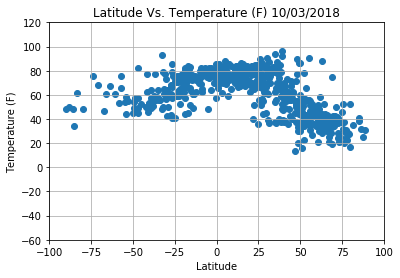

In [47]:
#Latitude vs Temperature Scatter Plot
plt.scatter(new_dataframe["Latitude"],new_dataframe["Temperature (F)"],marker ="o")
plt.title(f"Latitude Vs. Temperature (F) {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim([-100, 100])
plt.ylim([-60, 120])
plt.grid(True)
plt.savefig("Temperature.png")

plt.show()

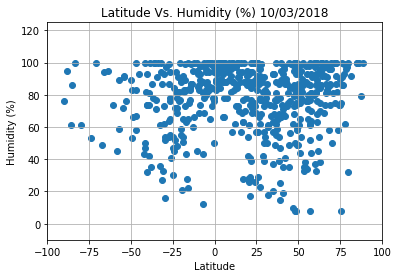

In [48]:
#Latitude vs Humidity Scatter Plot
plt.scatter(new_dataframe["Latitude"],new_dataframe["Humidity (%)"],marker ="o")
plt.title(f"Latitude Vs. Humidity (%) {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-100, 100])
plt.ylim([-10, 125])
plt.grid(True)
plt.savefig("Humidity.png")

plt.show()

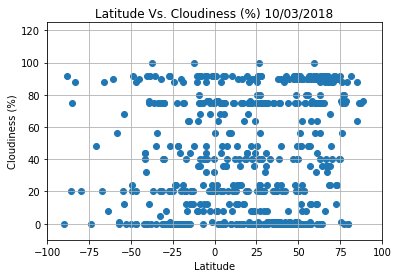

In [49]:
#Latitude vs Cloudiness Scatter Plot
plt.scatter(new_dataframe["Latitude"],new_dataframe["Cloudiness (%)"],marker ="o")
plt.title(f"Latitude Vs. Cloudiness (%) {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim([-100, 100])
plt.ylim([-10, 125])
plt.grid(True)
plt.savefig("Cloudiness.png")

plt.show()

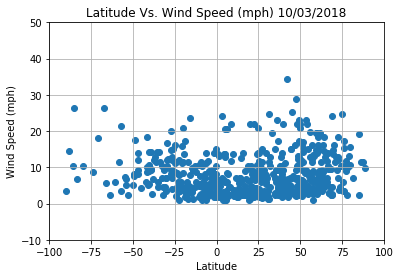

In [50]:
# Latitude vs Wind Speed Scatter Plot
plt.scatter(new_dataframe["Latitude"], new_dataframe["Wind Speed (mph)"], marker="o")
plt.title(f"Latitude Vs. Wind Speed (mph) {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim([-100, 100])
plt.ylim([-10, 50])
plt.grid(True)
plt.savefig("Windspeed.png")

plt.show()